# Eduardo Acosta Hernández A01375206

## Problemática a resolver

La yuca es un cultivo cuya popularidad ha aumentado en los últimos años, debido a sus propiedades nutricionales y su adaptabilidad en cuanto a climas, permitiendo cultivarla tanto en zonas humedad como cálidas.

Tan solo en 2017, en México se produjeron 18,989 toneladas de yuca las cuales fueron cosechadas de 1,509 hectareas.

Este arbusto es cultivado principalmente po la raíz, de la cual se obtienen dos tipos de productos; el primero de ellos se destina especialmente para la alimentación del ganado, ya sea en forma de harina, hojuela o gránulos; y el almidón, que es el producto principal que se utiliza tanto en la industria alimenticia (pan, pastelería, mermeladas), textil, así como en la fabricación de papeles y adhesivos.

Al aumentar el cultivo de yuca cada vez es más complicado llevar un control de calidad para detectar y eliminar opotunamente las enfermedades y plagas, las cuatro principales son:


*   Enfermedad del mosaico de la yuca (CMD)
*   Tizón bacteriano de la yuca (CBB)
*   Ácaro verde de la yuca (CGM)
*   Enfermedad de la raya marrón de la yuca (CBSD)

Para poder realizar una aportación en el control de plagas y enfermedades de este cultivo se realizará un modelo de deep learning de reconocimiento de imágenes que sea de apoyo para la identificación oportuna de plagas y enfermedades.

El dataset a usar es "cassava" de TensorFlow.

Bibliografía:


Servicio de Información Agroalimentaria y Pesquera & Gobierno de México. (2018). Yuca, mandioca o guacamote: ¿cómo lo llaman donde radicas? gob.mx. Recuperado 17 de noviembre de 2022, de https://www.gob.mx/siap/articulos/yuca-mandioca-o-guacamote-como-lo-llaman-donde-radicas



In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import tensorflow_datasets as tfds
import math
import cv2
from tensorflow.keras.callbacks import TensorBoard

In [2]:
data, metadata = tfds.load('cassava', as_supervised=True, with_info=True)

In [3]:
metadata

tfds.core.DatasetInfo(
    name='cassava',
    full_name='cassava/0.1.0',
    description="""
    Cassava consists of leaf images for the cassava plant depicting healthy and
    four (4) disease conditions; Cassava Mosaic Disease (CMD), Cassava Bacterial
    Blight (CBB), Cassava Greem Mite (CGM) and Cassava Brown Streak Disease (CBSD).
    Dataset consists of a total of 9430 labelled images.
    The 9430 labelled images are split into a training set (5656), a test set(1885)
    and a validation set (1889). The number of images per class are unbalanced with
    the two disease classes CMD and CBSD having 72% of the images.
    """,
    homepage='https://www.kaggle.com/c/cassava-disease/overview',
    data_path='C:\\Users\\laloa\\tensorflow_datasets\\cassava\\0.1.0',
    file_format=tfrecord,
    download_size=1.26 GiB,
    dataset_size=1.26 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.s

,image,label
0,,3 (cmd)
1,,2 (cgm)
2,,3 (cmd)
3,,3 (cmd)
4,,3 (cmd)

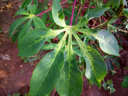
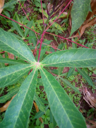
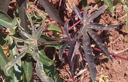
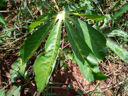
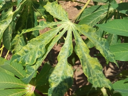

In [4]:
tfds.as_dataframe(data['train'].take(5),metadata)

## Normalización de los datos


Para normalizar los datos convertiremos les daremos un tamaño igual a todas las imagenes y las pasaremos a escala de grises

### Train

In [5]:
#Creamos listas vacías para almacenar las imágenes transformadas y las etiquetas
transformed_train=[]
train_labels = []

for i, (image, label) in enumerate(data['train']):
    image = cv2.resize(image.numpy(), (200,200))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image.reshape(200,200,1)
    transformed_train.append(image)
    train_labels.append(label)

In [6]:
#Normalizamos los datos convirtiendo la lista de valores en un arreglo np y dividiendolo entre 255
#de modo que ahora 1 equivale a 255
normalized_train=np.array(transformed_train).astype(float)/255

In [7]:
#Convertimos labels a un arreglo numpy de modo que solamente almacena los valores correspondientes de 1 a 4
train_labels=np.array(train_labels)

### Test

In [8]:
#Creamos listas vacías para almacenar las imágenes transformadas y las etiquetas
transformed_test=[]
test_labels = []

for i, (image, label) in enumerate(data['test']):
    image = cv2.resize(image.numpy(), (200,200))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image.reshape(200,200,1)
    transformed_test.append(image)
    test_labels.append(label)

In [9]:
#Normalizamos los datos convirtiendo la lista de valores en un arreglo np y dividiendolo entre 255
#de modo que ahora 1 equivale a 255
normalized_test=np.array(transformed_test).astype(float)/255

In [10]:
#Convertimos labels a un arreglo numpy de modo que solamente almacena los valores correspondientes de 1 a 4
test_labels=np.array(test_labels)

## Primer modelo (Red neuronal Secuencial)

Para el primer modelo realizaremos una red neuronal secuencial
con la siguiente estructura:


*   Una capa de entrada flatten para recibir las imágenes
*   Edos capas denza con 30 neuronas y función de activación relu
*   Capa de salida densa con 10 neuronas y función de activación softmax




In [11]:
model1=tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(200,200,1)),
  tf.keras.layers.Dense(30, activation=tf.nn.relu),
  tf.keras.layers.Dense(30, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [12]:
model1.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)

In [13]:
tensorboard_model1=TensorBoard(log_dir='logs/tensorboard_model1')
model1.fit(normalized_train, train_labels, batch_size=32,
           validation_split=0.2,
           epochs=30,
           callbacks=[tensorboard_model1])

Epoch 1/30
142/142 [==============================] - 5s 32ms/step - loss: 6.8315 - accuracy: 0.1930 - val_loss: 4.8863 - val_accuracy: 0.2376
Epoch 2/30
142/142 [==============================] - 5s 32ms/step - loss: 4.8477 - accuracy: 0.2595 - val_loss: 4.8862 - val_accuracy: 0.2376
Epoch 3/30
142/142 [==============================] - 5s 33ms/step - loss: 4.8476 - accuracy: 0.2213 - val_loss: 4.8861 - val_accuracy: 0.0901
Epoch 4/30
142/142 [==============================] - 5s 33ms/step - loss: 4.8476 - accuracy: 0.0805 - val_loss: 4.8861 - val_accuracy: 0.0901
Epoch 5/30
142/142 [==============================] - 4s 31ms/step - loss: 4.8476 - accuracy: 0.1335 - val_loss: 4.8861 - val_accuracy: 0.1290
Epoch 6/30
142/142 [==============================] - 5s 32ms/step - loss: 4.8476 - accuracy: 0.1386 - val_loss: 4.8861 - val_accuracy: 0.1290
Epoch 7/30
142/142 [==============================] - 5s 35ms/step - loss: 4.8476 - accuracy: 0.1386 - val_loss: 4.8861 - val_accuracy: 0.1290

In [23]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [20]:
%reload_ext tensorboard

In [24]:
%tensorboard --logdir logs


Reusing TensorBoard on port 6006 (pid 12972), started 1:38:23 ago. (Use '!kill 12972' to kill it.)

In [22]:
!kill 12972

"kill" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


### Evaluación modelo 1

Grafico durante el entrenamiento

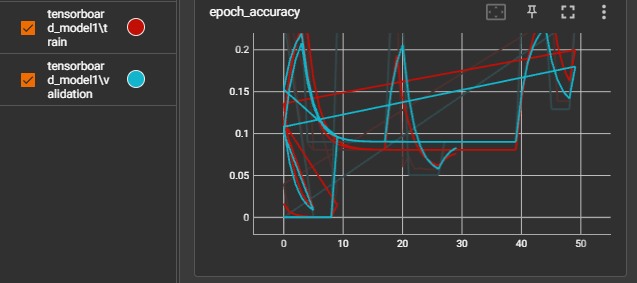

In [22]:
test_loss, test_acc = model1.evaluate(normalized_test,test_labels)

59/59 [==============================] - 1s 21ms/step - loss: 4.8553 - accuracy: 0.2552


Como podemos observar en el entrenamiento el modelo comenzó con una curva positiva en cuanto a excatitud durante los primeros 4 epochs, posteriormente redujo drasticamente y luego aumento en los epochs 21 y decayó nuevamente.
De igual forma se puede observar que la exactitud del modelo al evaluarlo con el set de pruebas es de 0.2552 lo cual es bajo.

### Modelo 2

Para este modelo se realizarán las siguietnes modificaciones a ciertos hiperparametros del modelo 1:
* Disminución en la cantidad de epochs
* Modificación a las capas intermedias aumentando las neuronas de entrenamiento
* Modificación a la capa de salida reduciendo las neuronas
* Reduccion a los datos de validación durante el entrenamiento

In [24]:
model2=tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(200,200,1)),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

model2.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)

tensorboard_model2=TensorBoard(log_dir='logs/tensorboard_model2')
model2.fit(normalized_train, train_labels, batch_size=32,
           validation_split=0.15,
           epochs=15,
           callbacks=[tensorboard_model2])

Epoch 1/15
151/151 [==============================] - 8s 52ms/step - loss: 3.9729 - accuracy: 0.2330 - val_loss: 2.8280 - val_accuracy: 0.4994
Epoch 2/15
151/151 [==============================] - 8s 50ms/step - loss: 2.7433 - accuracy: 0.2284 - val_loss: 2.7205 - val_accuracy: 0.1508
Epoch 3/15
151/151 [==============================] - 8s 51ms/step - loss: 2.7159 - accuracy: 0.2168 - val_loss: 2.6921 - val_accuracy: 0.2921
Epoch 4/15
151/151 [==============================] - 8s 50ms/step - loss: 2.7190 - accuracy: 0.2197 - val_loss: 2.6916 - val_accuracy: 0.1319
Epoch 5/15
151/151 [==============================] - 7s 50ms/step - loss: 2.6853 - accuracy: 0.2126 - val_loss: 2.8885 - val_accuracy: 0.2379
Epoch 6/15
151/151 [==============================] - 8s 50ms/step - loss: 2.7282 - accuracy: 0.2494 - val_loss: 2.6744 - val_accuracy: 0.3333
Epoch 7/15
151/151 [==============================] - 7s 50ms/step - loss: 2.6705 - accuracy: 0.2188 - val_loss: 2.6715 - val_accuracy: 0.1873

In [25]:
test_loss, test_acc = model2.evaluate(normalized_test,test_labels)

59/59 [==============================] - 2s 34ms/step - loss: 2.6645 - accuracy: 0.2716


Como podemos observar obtuvimos una mayor exactitud sin embargo esta sigue siendo baja, por lo tanto el siguiente modelo será una red neurona convolutiva la cual nos debería proporcionar una mayor exactitud debido a que su arquitectura le permite ser muy superior al modelo secuencial en cuanto a la clasificación de imágenes.

### Modelo 3

In [29]:
model3=tf.keras.Sequential([
  tf.keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(200,200,1)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation=tf.nn.relu),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation=tf.nn.relu),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

model3.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)

tensorboard_model3=TensorBoard(log_dir='logs/tensorboard_model3')
model3.fit(normalized_train, train_labels, batch_size=32,
           validation_split=0.15,
           epochs=15,
           callbacks=[tensorboard_model3])

Epoch 1/15
151/151 [==============================] - 652s 4s/step - loss: 2.7030 - accuracy: 0.1036 - val_loss: 2.6635 - val_accuracy: 0.1001
Epoch 2/15
151/151 [==============================] - 619s 4s/step - loss: 2.6625 - accuracy: 0.0934 - val_loss: 2.6635 - val_accuracy: 0.1119
Epoch 3/15
151/151 [==============================] - 627s 4s/step - loss: 2.6625 - accuracy: 0.1916 - val_loss: 2.6635 - val_accuracy: 0.2403
Epoch 4/15
151/151 [==============================] - 622s 4s/step - loss: 2.6625 - accuracy: 0.2617 - val_loss: 2.6635 - val_accuracy: 0.2450
Epoch 5/15
151/151 [==============================] - 622s 4s/step - loss: 2.6625 - accuracy: 0.2607 - val_loss: 2.6635 - val_accuracy: 0.2462
Epoch 6/15
151/151 [==============================] - 618s 4s/step - loss: 2.6625 - accuracy: 0.2611 - val_loss: 2.6635 - val_accuracy: 0.2497
Epoch 7/15
151/151 [==============================] - 609s 4s/step - loss: 2.6625 - accuracy: 0.2590 - val_loss: 2.6635 - val_accuracy: 0.2544

In [31]:
test_loss, test_acc = model3.evaluate(normalized_test,test_labels)

59/59 [==============================] - 35s 595ms/step - loss: 2.6627 - accuracy: 0.2647
